In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')



In [ ]:
train_data = pd.read_csv('Train titanic.csv')
test_data = pd.read_csv('Test titanic.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.shape

(891, 12)

Train_data has 891 rows and 12 columns

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.shape

(418, 11)

test_data has 418 rows and 11 columns

In [ ]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked columns has 177, 687, and 2 missing values respectively

In [ ]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age, Fare and Cabin columns has 86, 1, and 327 missing values respectively



#### Exploring data

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


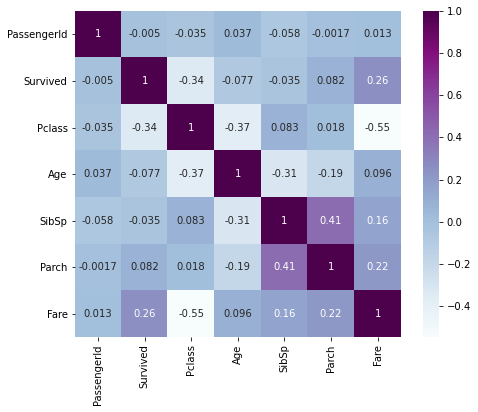

In [ ]:
matrix = train_data.corr()
fig = plt.figure(figsize=(8, 6)) 
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

Age, passangerld ans sibsp had a negative correlation on survuvial while fare had a strong positive correlation to survival.

#### Exploratory Data Analysis

#### Histograms

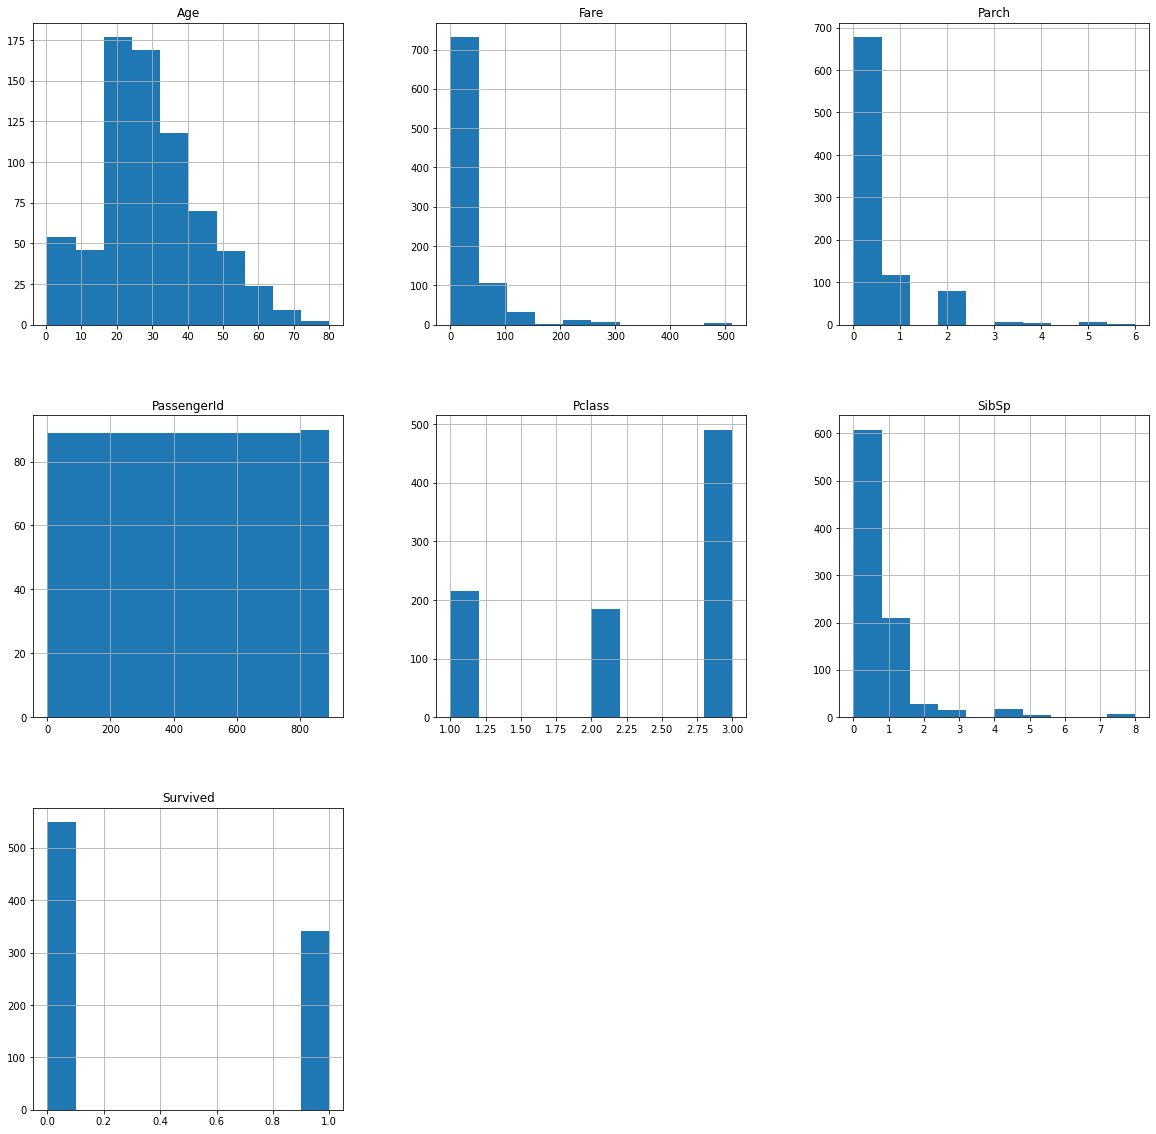

In [ ]:
train_data.hist(figsize=(20,20));

Most people traveled alone (SibSp and Parch).
Most people paid a fare less than $50.
There is some very young children amongst the passengers.
Age was normally distributed

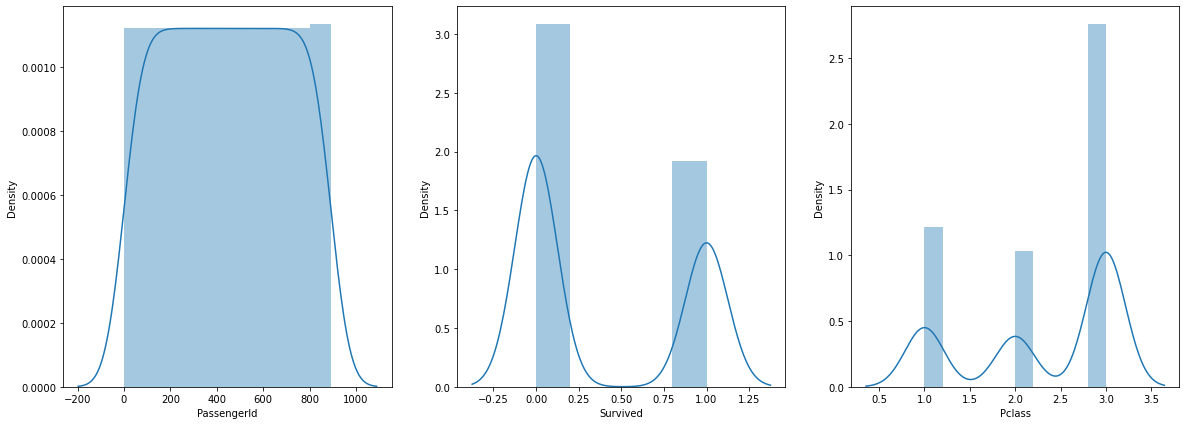

In [ ]:
def distributionplots():
    fig, axes = plt.subplots(nrows = 1, ncols = 3)    
    axes = axes.flatten()         
    fig.set_size_inches(20, 7)

    for ax, col in zip(axes, train_data):
        sns.distplot(train_data[col], ax = ax)
distributionplots()

In [ ]:
categorical_variable_df = train_data.select_dtypes(include=['object'])
categorical_variable_df.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
train_data.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

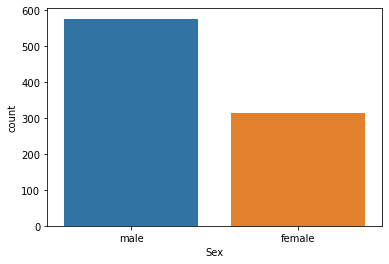

In [ ]:
sns.countplot(x=train_data.Sex)


There were almost twice as many males than females

In [ ]:
train_data.Ticket.value_counts(normalize=True)

CA. 2343    0.007856
347082      0.007856
1601        0.007856
CA 2144     0.006734
347088      0.006734
              ...   
695         0.001122
11755       0.001122
347071      0.001122
347078      0.001122
21440       0.001122
Name: Ticket, Length: 681, dtype: float64

So many values

In [ ]:
train_data.Cabin.value_counts(normalize=True)

C23 C25 C27    0.019608
G6             0.019608
B96 B98        0.019608
F33            0.014706
C22 C26        0.014706
                 ...   
D9             0.004902
F E69          0.004902
C70            0.004902
C91            0.004902
C128           0.004902
Name: Cabin, Length: 147, dtype: float64

So many Values

In [ ]:
train_data.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

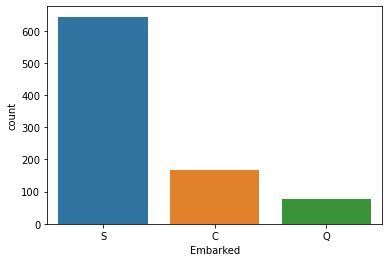

In [ ]:
sns.countplot(x= train_data.Embarked)


Those who were Embarked in Southampton port were the most and Queenstown were the least

Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

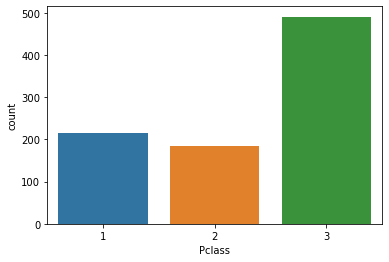

In [ ]:
sns.countplot(x=train_data.Pclass)

Most passangers were in class 3

### Effect of the variables on survival

In [ ]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female chance of survival was 4 times to that of male

In [ ]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Passangers in class 1 and 2 had a higher chance of surviving

In [ ]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


People from port C had a better chance of survival

#### How persons class affected survival

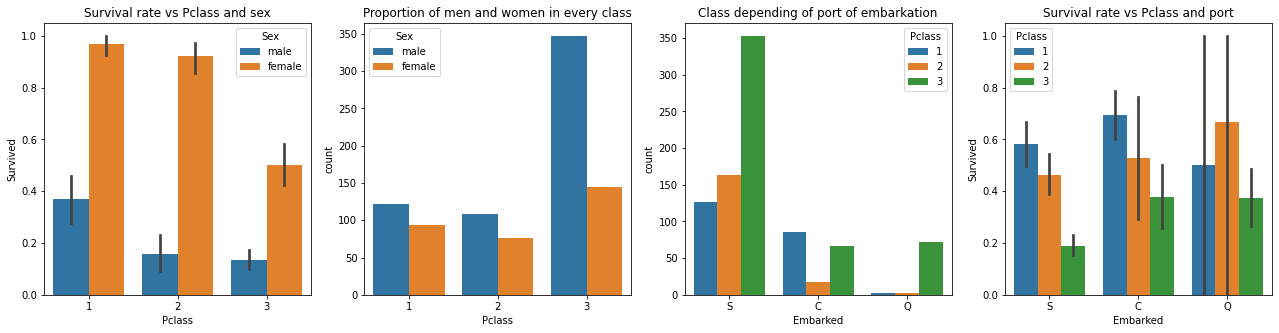

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(22,5))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_data, ax=ax[0])
ax[0].set_title('Survival rate vs Pclass and sex');
sns.countplot(x="Pclass", hue="Sex", data=train_data, ax=ax[1])
ax[1].set_title('Proportion of men and women in every class');
sns.countplot(x="Embarked", hue="Pclass", data=train_data, ax=ax[2])
ax[2].set_title('Class depending of port of embarkation');
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=train_data, ax=ax[3])
ax[3].set_title('Survival rate vs Pclass and port');

Females in all the classes had a higher chance of surviving than males

More men were on board but class 3 had alot of men

Very few people in class 1 and 2 embarqued in port Q which explains the very high std for the survival rate

People from class number 3 had a better chance of surviving if they embarqued in port C and Q.

#### Family size effect on survival

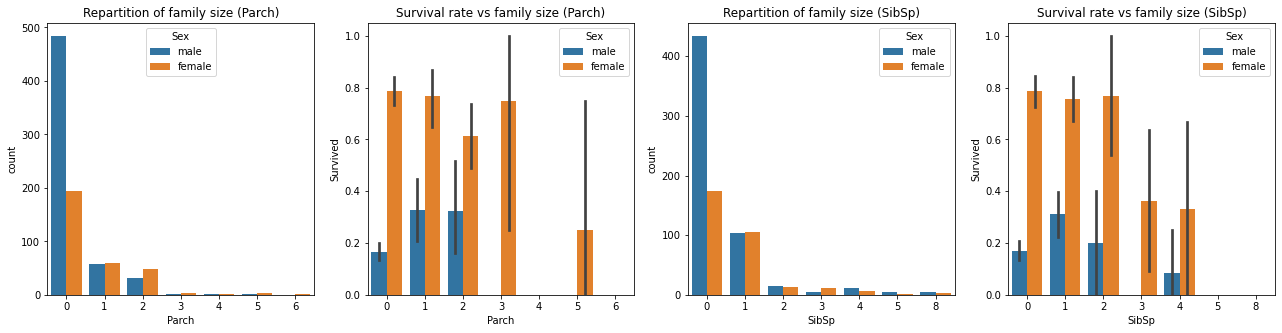

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(22,5))
sns.countplot(x="Parch", hue="Sex", data=train_data, ax=ax[0])
ax[0].set_title('Repartition of family size (Parch)');
sns.barplot(x="Parch", y="Survived", hue="Sex", data=train_data, ax=ax[1])
ax[1].set_title('Survival rate vs family size (Parch)');
sns.countplot(x="SibSp", hue="Sex", data=train_data, ax=ax[2])
ax[2].set_title('Repartition of family size (SibSp)');
sns.barplot(x="SibSp", y="Survived", hue="Sex", data=train_data, ax=ax[3])
ax[3].set_title('Survival rate vs family size (SibSp)');

Most people especially men travelled alone and most men who had company had a higher chance of survival

#### Effect of fare on survival

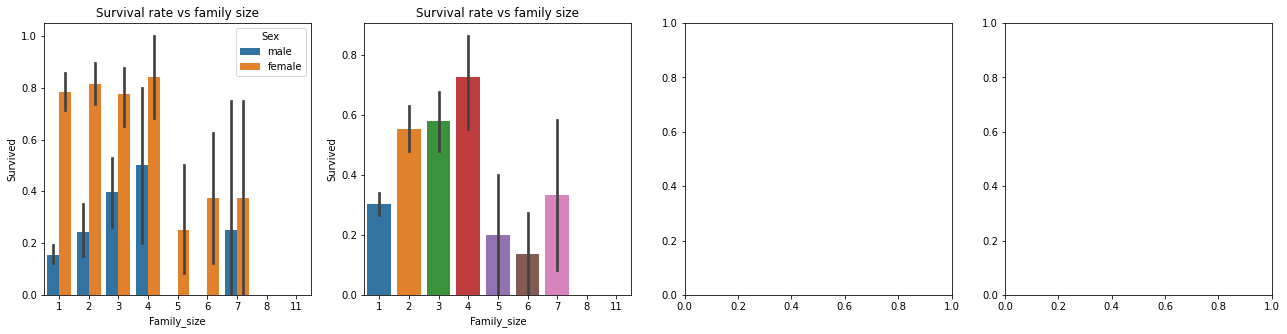

In [ ]:
#Let's first create a family size column and then a fare per person column.
df = train_data.copy()
df['Family_size'] = df['Parch']+df['SibSp']+1
df['Fare_per_person'] = df['Fare']/df['Family_size']
#Let's also reduce the maximum fare per person at 60 to avoid extreme values.
df.loc[df['Fare_per_person'] >= 60, 'Fare_per_person']=60
fig, ax = plt.subplots(1,4, figsize=(22,5))
sns.barplot(x="Family_size", y="Survived", hue="Sex", data=df, ax=ax[0])
ax[0].set_title('Survival rate vs family size');
sns.barplot(x="Family_size", y="Survived", data=df, ax=ax[1])
ax[1].set_title('Survival rate vs family size');

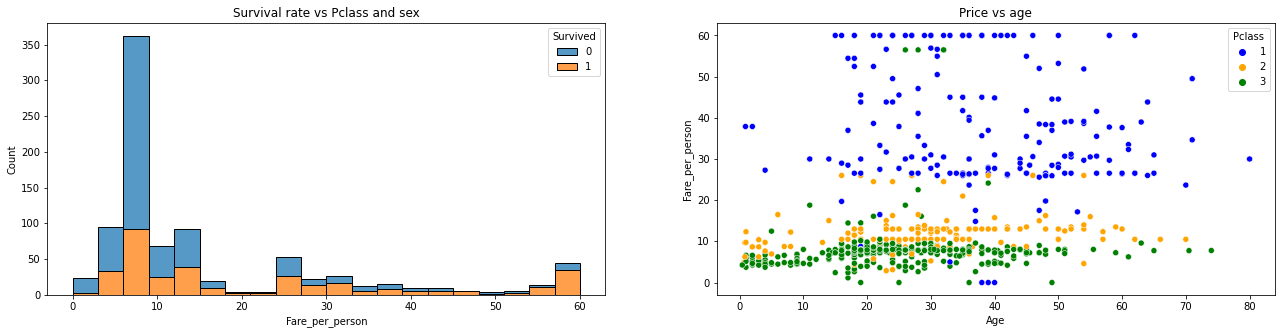

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(22,5))
sns.histplot(data=df, x='Fare_per_person', hue="Survived", multiple="stack", bins=20, ax=ax[0])
ax[0].set_title('Survival rate vs Pclass and sex');
sns.scatterplot(x="Age", y="Fare_per_person", hue="Pclass", data=df, ax=ax[1], palette=['blue', 'orange', 'green'])
ax[1].set_title('Price vs age');

Those who paid higher fares ahad a higher chance of surviving

## Machine Learning

#### Let's Now Handle the Missing Value

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
train_data.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

 ##### find some Relations next let's do the same with the Name, means Extract the Titles from the name and then find mean of thise and check for that

In [ ]:
#creating column title
train_data['Title'] = train_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
the Countess      1
Mme               1
Sir               1
Ms                1
Lady              1
Don               1
Jonkheer          1
Capt              1
Name: Title, dtype: int64

In [ ]:
test_data['Title'] = test_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

##### Here we have seen that the Common names/Most frequents are Mr, Miss,Mrs and Master so let's do accordingly

In [ ]:
Common_Title = ['Mr', 'Miss', 'Mrs', 'Master']
train_data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
train_data['Title'].replace(['Lady'], 'Mrs', inplace=True)
train_data['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
train_data['Title'][~train_data.Title.isin(Common_Title)] = 'Others'

In [ ]:
test_data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
test_data['Title'].replace(['Lady'], 'Mrs', inplace=True)
test_data['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
test_data['Title'][~test_data.Title.isin(Common_Title)] = 'Others'

In [ ]:
train_data.groupby(['Title'])['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.569136
Mrs       36.009174
Others    46.142857
Name: Age, dtype: float64

In [ ]:
train_data["Age"]=train_data.groupby('Title')['Age'].apply(lambda x:x.fillna(x.mean()))

In [ ]:
test_data["Age"]=test_data.groupby(['Pclass'])['Age'].apply(lambda x:x.fillna(x.mean()))

In [ ]:
# Replace The NaN value for Fare
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [ ]:
# Fill the Vallues with "S" in the place of NULL values of EMbarked column
train_data['Embarked'].fillna('S',inplace=True)

In [ ]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


### Machine Learning

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


#### One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
train_data['Embarked']=label.fit_transform(train_data['Embarked'])
test_data['Embarked']=label.fit_transform(test_data['Embarked'])

In [ ]:
train_data['Sex']=label.fit_transform(train_data['Sex'])
test_data['Sex']=label.fit_transform(test_data['Sex'])

In [ ]:
train_data['Title']=label.fit_transform(train_data['Title'])
test_data['Title']=label.fit_transform(test_data['Title'])

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,2


#### Future Engineering

In [ ]:
# Drop Unnecessary Columns
train_data.drop(['Name','PassengerId','SibSp','Parch','Ticket'],axis=1,inplace=True)

In [ ]:
# Drop Unnecessary Columns
test_data.drop(['Name','SibSp','Parch','Ticket'],axis=1,inplace=True)

#### Model building

In [ ]:
X=train_data.drop('Survived',axis=1)
y=train_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
# prepare models
#function for all the models
def models(X_train, y_train):
    #Logistic regression
    LG = LogisticRegression()
    LG.fit(X_train, y_train)
    
    #Kneighbors
    KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    KNN.fit(X_train, y_train)
    
    # SVC( linear kernel)
    SVC_lin= SVC(kernel='linear', random_state = 100)
    SVC_lin.fit(X_train, y_train)
    
    # SVC (RBF Kernel)
    SVC_rbf= SVC(kernel='rbf', random_state = 100)
    SVC_rbf.fit(X_train, y_train)
    
    # GaussianNB
    Gauss= GaussianNB()
    Gauss.fit(X_train, y_train)
    
    #Decision tree
    DT= DecisionTreeClassifier(criterion = 'gini', max_depth=None, random_state=1000)
    DT.fit(X_train, y_train)
    
    #Random Forest Classifier
    RF= RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=100)
    RF.fit(X_train, y_train)
    
    #Gradient Boosting Classifier
    GB = GradientBoostingClassifier(n_estimators=100, max_depth=None, random_state=100)
    GB.fit(X_train, y_train)
    
    #ADA Boost Classifier
    ADA = AdaBoostClassifier(  n_estimators=50, random_state=None)
    ADA.fit(X_train, y_train)
    
    
    # Print training accuracy for each model
    print('[0]Logistic Regression Training Accuracy:', LG.score(X_train, y_train))
    print('[1]K Nneighbors  Training Accuracy:', KNN.score(X_train, y_train))
    print('[2]SVC Linear Training Accuracy:', SVC_lin.score(X_train, y_train))
    print('[3]SVC RBF Training Accuracy:', SVC_rbf.score(X_train, y_train))    
    print('[4]Gaussian NB Training Accuracy:', Gauss.score(X_train, y_train))    
    print('[5]Decision Tree Training Accuracy:', DT.score(X_train, y_train))    
    print('[6]Random Forest Training Accuracy:', RF.score(X_train, y_train)) 
    print('[7]Gradient Boosting Training Accuracy:', GB.score(X_train, y_train)) 
    print('[8]ADA Boost Classifier Training Accuracy:', ADA.score(X_train, y_train)) 
    
    return LG, KNN, SVC_lin, SVC_rbf, Gauss, DT, RF, GB, ADA

In [ ]:
#Getting and Training all the Models

model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.7935393258426966
[1]K Nneighbors  Training Accuracy: 0.7921348314606742
[2]SVC Linear Training Accuracy: 0.7921348314606742
[3]SVC RBF Training Accuracy: 0.6811797752808989
[4]Gaussian NB Training Accuracy: 0.7837078651685393
[5]Decision Tree Training Accuracy: 0.9859550561797753
[6]Random Forest Training Accuracy: 0.9859550561797753
[7]Gradient Boosting Training Accuracy: 0.9859550561797753
[8]ADA Boost Classifier Training Accuracy: 0.848314606741573


In [ ]:
# Show the confusion matrices and accuracy for all the models on the test data
for i in range(len(model) ):
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    
    #Etract TN, FP, FN, TP
    TN, FP, FN, TP = cm.ravel()
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('model[{}] Testing Accuracy ="{}"'. format(i, test_score))
    print()

[[90 17]
 [21 51]]
model[0] Testing Accuracy ="0.7877094972067039"

[[84 23]
 [35 37]]
model[1] Testing Accuracy ="0.6759776536312849"

[[87 20]
 [22 50]]
model[2] Testing Accuracy ="0.7653631284916201"

[[97 10]
 [49 23]]
model[3] Testing Accuracy ="0.6703910614525139"

[[81 26]
 [15 57]]
model[4] Testing Accuracy ="0.770949720670391"

[[89 18]
 [22 50]]
model[5] Testing Accuracy ="0.776536312849162"

[[90 17]
 [22 50]]
model[6] Testing Accuracy ="0.7821229050279329"

[[90 17]
 [24 48]]
model[7] Testing Accuracy ="0.770949720670391"

[[92 15]
 [16 56]]
model[8] Testing Accuracy ="0.8268156424581006"



In [ ]:
model = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=100)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=100)

In [ ]:
# Print the prediction of the Random Forest
y_pred = model[6].predict(X_test)
print(y_pred)

print()

#Print actual values
print(y_test)

[0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]

642    0
156    1
614    0
43     1
835    1
      ..
141    1
660    1
626    0
238    0
820    1
Name: Survived, Length: 179, dtype: int64


In [ ]:
# Get feature importance
ada = model[6]
importances = pd.DataFrame({'feature': train_data.iloc[:, 1:8].columns, 'importance': np.round(ada.feature_importances_, 6)})
importances= importances.sort_values('importance', ascending= False). set_index('feature')
importances

,importance
feature,
Fare,0.337389
Age,0.270841
Sex,0.188627
Pclass,0.142548
Title,0.049532
Embarked,0.011063


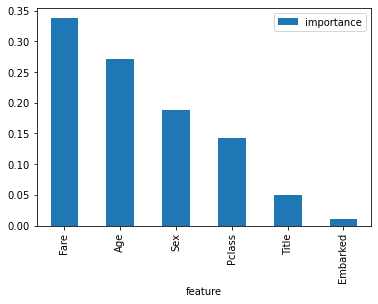

In [ ]:
# Visualize the importance
importances.plot.bar()

In [ ]:
model.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(X_test))*100

78.2122905027933

In [ ]:
from sklearn.model_selection import cross_val_score
Overall_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print(Overall_accuracies)
Overall_accuracies.mean()*100

[0.83216783 0.82517483 0.81690141 0.83098592 0.75352113]


81.17502216093764

In [ ]:
test_pred = test_data.drop("PassengerId", axis=1).copy()
prediction = model.predict(test_pred)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)